# Kosova News Articles

// Fill this @Ariana

## Libraritë e përdorura

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gzip
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import plotly.express as px
from sklearn.cluster import DBSCAN
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder


## Konstantet e përdorura

In [2]:
# Përcaktimi i ngjyrave për ti paraqitur në statistika.
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]
categorical_columns = ['content', 'date', 'title', 'category', 'author', 'source']

## Metodat ndihmëse

In [3]:
# Funksioni për të hedhur një vështrim në rreshtat e parë të dataset-it.
def printo_datasetin(text, df):
    print("\n" + text + ":")
    display(df.head())


## Leximi i dataset-it

In [4]:
# Leximi i dataset-it
df = pd.read_csv("files/Kosovo_News_Articles.csv")
# new_df = pd.read_csv("../files/Preprocessed_Kosovo_News_Articles_Dataset.csv")

## Kualiteti i të dhënave 

- Struktura e bazës së të dhënave

In [5]:
# Shfaqja e dataseti-it
printo_datasetin("Dataset-i", df)


Dataset-i:


,content,date,title,category,author,source
0,Kur Beatrice Borromeo u martua me Pierre Casir...,2021-08-26 12:24:57,As Kate as Meghan; ja cila është princesha më ...,Fun;Argëtim,Donika Gjoni,Lajmi
1,Gjatë kontrollit të automjetit zyrtarët polico...,2021-08-26 12:14:38,"I kapen 10 kg substanca narkotike në BMW X5, a...",Lajme;Nacionale,Flutura Toplana,Lajmi
2,Së fundmi Real Madrid dërgoi një ofertë 160 mi...,2021-08-26 12:14:00,"E fundit, Mbappe mund të zyrtarizohet nesër te...",La Liga;Lajme futbolli;Sport,Muhamet Mehmeti,Lajmi
3,Enca Haxhia njihet si një ndër këngëtaret më s...,2021-08-26 12:13:58,Enca e quan jetë pushimin në plazh me poza në ...,nan;Entertainment,Fjolla Gashi,Lajmi
4,Gurët në veshka janë depozitime minerale që fo...,2021-08-26 12:07:45,Gurët në veshka – Kurat natyrale dhe si t’i pë...,Lifestyle;Shëndeti,Donika Gjoni,Lajmi


- Njohuri mbi llojet e të dhënave

In [6]:
# Për të fituar njohuri mbi llojet e të dhënave ekzekutojmë këtë komandë:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593450 entries, 0 to 2593449
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   content   object
 1   date      object
 2   title     object
 3   category  object
 4   author    object
 5   source    object
dtypes: object(6)
memory usage: 118.7+ MB


- Kontrollimi i vlerave null

In [7]:
# Komanda për kontrollimin e vlerave null:
df.isnull().sum()

content     10409
date            2
title           0
category    26551
author       8577
source          0
dtype: int64

- Trajtimi i vlerave null

In [8]:
# Fshirja e rreshtave me vlera null në kolonat me vlera null
new_df = df.dropna(subset=['content', 'date', 'title', 'category', 'author', 'source'])

# Shfaqja e dataseti-it të modifikuar
print(new_df.isnull().sum())

content     0
date        0
title       0
category    0
author      0
source      0
dtype: int64


- Kërkimi i duplikatëve

In [9]:
# Komanda për kërkimin e duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(df.duplicated().sum()))

Duplikatet: 613866


In [10]:
# ----------- Fshirja e duplikateve -----------
new_df.drop_duplicates(['content', 'date', 'title', 'category', 'author', 'source'], 
                   keep='first', inplace=True)

# Kërkimi përsëri i duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(new_df.duplicated().sum()))

C:\Users\arian\AppData\Local\Temp\ipykernel_39776\48989597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop_duplicates(['content', 'date', 'title', 'category', 'author', 'source'],


Duplikatet: 0


#### Trajtimi i vlerave NAN 

In [11]:

# Lista e emrave të kolonave për të kontrolluar numrin e NaN vlerave
columns_to_check = ["content", "category", "date", "title", "author", "source"]

# Përdorimi i një cikli për të llogaritur numrin e NaN vlerave për secilën kolonë
for column in columns_to_check:
    nan_count = df[column].isna().sum()
    print(f"Numri i qelive pa vlerë të detektuar në kolonën '{column}' është: {nan_count}")


Numri i qelive pa vlerë të detektuar në kolonën 'content' është: 10409
Numri i qelive pa vlerë të detektuar në kolonën 'category' është: 26551
Numri i qelive pa vlerë të detektuar në kolonën 'date' është: 2
Numri i qelive pa vlerë të detektuar në kolonën 'title' është: 0
Numri i qelive pa vlerë të detektuar në kolonën 'author' është: 8577
Numri i qelive pa vlerë të detektuar në kolonën 'source' është: 0


In [12]:

# Fshirja e rreshtave që përmbajnë vlera NaN
df = df.dropna(axis=0, how='any')

In [13]:

# Lista e emrave të kolonave për të kontrolluar numrin e NaN vlerave
columns_to_check = ["content", "category", "date", "title", "author", "source"]

# Përdorimi i një cikli për të llogaritur numrin e NaN vlerave për secilën kolonë
print("Pas pastrimit të vlerave NaN")
for column in columns_to_check:
    nan_count = df[column].isna().sum()
    print(f"Numri i qelive pa vlerë të detektuar në kolonën '{column}' është: {nan_count}")

Pas pastrimit të vlerave NaN
Numri i qelive pa vlerë të detektuar në kolonën 'content' është: 0
Numri i qelive pa vlerë të detektuar në kolonën 'category' është: 0
Numri i qelive pa vlerë të detektuar në kolonën 'date' është: 0
Numri i qelive pa vlerë të detektuar në kolonën 'title' është: 0
Numri i qelive pa vlerë të detektuar në kolonën 'author' është: 0
Numri i qelive pa vlerë të detektuar në kolonën 'source' është: 0


### Agregimi

In [14]:
category_counts = df['category'].value_counts()

# Display the counts for each category
print(category_counts)

category
Lajme                                                                                   429253
Kosovë                                                                                  154484
Sport                                                                                    96122
nan;Entertainment                                                                        92753
Lajme;Nacionale                                                                          92184
                                                                                         ...  
Loredana në studio për projektin e ri                                                        1
Rina Balaj fotografohet e zhveshur në vaskë                                                  1
Qalaj paralajmëron mbylljen e lokaleve që nuk respektojnë masat kundër COVID-19              1
Albulena Haxhiu thotë se s’ka dialog me Serbinë pa zgjedhje demokratike paraprakisht         1
Lista                                    

### Trajtimi i outliers

In [15]:
# Define a function to remove category values containing spaces
def remove_spaces(category):
    # Check if the category contains spaces
    if ' ' in category:
        # Return an empty string to remove the category value
        return ''
    else:
        # If no spaces, return the original category value
        return category

# Apply the function to each cell in the 'category' column
df['category'] = df['category'].apply(lambda x: remove_spaces(x))

# Largojmë fjalën 'nan;' nga kolona 'category'
df['category'] = df['category'].str.replace('nan;', '')

In [16]:
category_counts = df['category'].value_counts()

# Display the counts for each category
print(category_counts)

category
                               631785
Lajme                          429598
Kosovë                         154485
Sport                           96124
Entertainment                   92853
                                ...  
Impakti;Lajme;Shëndeti              1
Lajme;Profil;Reportazh              1
Intervistë;Lajm                     1
Gjatë;Lajme;Rajon;Reportazh         1
Lista                               1
Name: count, Length: 1236, dtype: int64


In [17]:
# Replace empty strings with NaN in the specific column
df['category'].replace('', pd.NA, inplace=True)

# Remove rows with empty string values in the specific column
df.dropna(subset=['category'], inplace=True)

### Krijimi i nënbashkësive

In [18]:

selected_columns = ['title', 'content', 'category']

subset = df[selected_columns]

# Shfaqim një pjesë të nën-bashkësisë për verifikim
print(subset.head())

                                               title   
0  As Kate as Meghan; ja cila është princesha më ...  \
1  I kapen 10 kg substanca narkotike në BMW X5, a...   
3  Enca e quan jetë pushimin në plazh me poza në ...   
4  Gurët në veshka – Kurat natyrale dhe si t’i pë...   
5  Trupi gjykues ua vazhdon paraburgimin Nasim Ha...   

                                             content            category  
0  Kur Beatrice Borromeo u martua me Pierre Casir...         Fun;Argëtim  
1  Gjatë kontrollit të automjetit zyrtarët polico...     Lajme;Nacionale  
3  Enca Haxhia njihet si një ndër këngëtaret më s...       Entertainment  
4  Gurët në veshka janë depozitime minerale që fo...  Lifestyle;Shëndeti  
5  Në vendim thuhet se Zyra e Prokurorit të Speci...     Lajme;Nacionale  


### Klasat e shtrembura

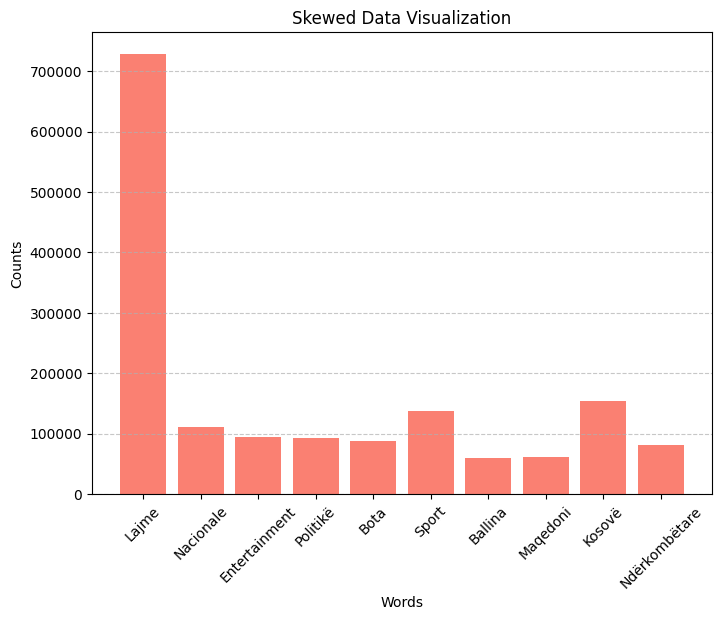

In [53]:

from collections import Counter

category_column = df['category']

# Initialize an empty dictionary to store word counts
word_counts = Counter()

# Iterate over each cell in the category column
for category in category_column:
    # Split the category string into individual words
    words = category.split(';')
    # Update the word counts
    word_counts.update(words)

# Extract the word list and counts
word_list = list(word_counts.keys())
counts = list(word_counts.values())

# Calculate skewness threshold (e.g., words with counts more than one standard deviation away from the mean)
mean_count = np.mean(counts)
std_count = np.std(counts)
skewness_threshold = std_count

# Identify skewed words
skewed_words = {word: count for word, count in word_counts.items() if abs(count - mean_count) > skewness_threshold}

# Extract skewed words and their counts
skewed_words_list = list(skewed_words.keys())
skewed_counts = [word_counts[word] for word in skewed_words_list]

# Plot histogram for skewed words
plt.figure(figsize=(8, 6))
plt.bar(skewed_words_list, skewed_counts, color='salmon')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Skewed Data Visualization')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### SMOTE Algoritmi

In [ ]:
# Metoda për paraqitjen e SMOTE Algoritmit

def SMOTE_Algoritmi(dataseti):

    def SMOTE(X, y, minority_class, k=5):
        """
        :param X: numpy.ndarray or pandas.DataFrame (2D array)
        :param y: numpy.ndarray (1D array)
        :param minority_class: int
        :param k: int
        :return: np.array, np.array
        """
        # Find the minority class indices
        minority_indices = np.where(y == minority_class)[0]

        # Convert DataFrame to NumPy array if necessary
        X_array = X.to_numpy() if isinstance(X, pd.DataFrame) else X

        # Find the nearest neighbors of the minority class points
        nn = NearestNeighbors(n_neighbors=k)
        nn.fit(X_array[minority_indices])
        _, indices = nn.kneighbors(X_array[minority_indices])

        # Generate synthetic data points
        synthetic_data = []
        for i in range(len(minority_indices)):
            for j in indices[i]:
                diff = X_array[minority_indices[j]] - X_array[minority_indices[i]]
                synthetic_point = X_array[minority_indices[i]] + np.random.random(size=diff.shape) * diff
                synthetic_data.append(synthetic_point)

        # Concatenate the synthetic data with the original data and labels
        X_resampled = np.concatenate((X_array, synthetic_data), axis=0)
        Y_resampled = np.concatenate((y, np.full(len(synthetic_data), minority_class)), axis=0)

        return X_resampled, Y_resampled

    def pairplot(dataFrame):
        selected_columns = ['Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Shipping Type', 'Payment Method', 'Purchase Amount (USD)']  # Update this list based on your dataset
        if selected_columns is not None:
            dataFrame = dataFrame[selected_columns]
        # Create a pairplot with the target column as the hue
        sns.pairplot(dataFrame, hue='Purchase Amount (USD)')

        # Show the plot
        plt.show()

    def plot3d(dataFrame, x_feature, y_feature, z_feature):
        # Create a 3D scatter plot
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        
        # Now `ax` is defined and can be used for plotting
        scatter = ax.scatter(
            dataFrame[x_feature], dataFrame[y_feature], dataFrame[z_feature],
            c=dataFrame[z_feature], cmap='viridis', alpha=0.7, s=50
        )
        
        # Set labels for axes
        ax.set_xlabel(x_feature)
        ax.set_ylabel(y_feature)
        ax.set_zlabel(z_feature)

        # Color bar indicating the scale of the z_feature
        color_bar = fig.colorbar(scatter, ax=ax)
        color_bar.set_label(z_feature)

        # Show the plot
        plt.show()

    label_encoders = {}

    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Apply SMOTE - Assuming you want to oversample based on a particular target feature
    # Here, let's assume 'Purchase Amount (USD)' is the target and we oversample based on a threshold
    threshold = 50  # Example threshold, adjust as needed
    dataseti['Target_Class'] = (dataseti['Purchase Amount (USD)'] > threshold).astype(int)

    # Split the data (excluding non-feature columns like 'Customer ID')
    feature_columns = [col for col in dataseti.columns if col not in ['Customer ID', 'Review Rating', 'Target_Class']]
    X = dataseti[feature_columns]
    y = dataseti['Target_Class']

    # Apply SMOTE
    k = 3  # Number of nearest neighbors
    if np.sum(y == 1) < k:  # Assuming minority class is the one above the threshold
        raise ValueError("Not enough samples of minority class for SMOTE.")

    # Assuming X is your feature DataFrame
    imputer = SimpleImputer(strategy='mean') # Or use 'median' or 'most_frequent'
    X_imputed = imputer.fit_transform(X)

    # Now use the imputed data in SMOTE
    if np.sum(y == 1) < k:
        raise ValueError("Not enough samples of minority class for SMOTE.")
    # After SMOTE
    X_resampled, Y_resampled = SMOTE(X_imputed, y, minority_class=1, k=k)

    # Now, resampled_columns should match the columns in X
    resampled_columns = feature_columns  # Directly use feature_columns list

    # Create the DataFrame after SMOTE
    FinalDataFrame = pd.DataFrame(X_resampled, columns=resampled_columns)
    FinalDataFrame['Purchase Amount (USD)'] = Y_resampled

    # Add 'SeasonNum' back to FinalDataFrame
    FinalDataFrame['SeasonNum'] = df['SeasonNum']

    # Plotting
    pairplot(FinalDataFrame)
    plot3d(FinalDataFrame, 'Age', 'SeasonNum', 'Purchase Amount (USD)')


- Mostrimi i të dhënave